In [345]:
import numpy as np
def match_strips(strip_left, strip_right, b):
    blckN=int((strip_left.shape[1]/b));
    
    disparity=np.zeros((blckN));
    col=1+(blckN/5)
    row=5
    for i in range(0,blckN):
        xl=((i*b));
        #4print(xl,xl+b-1)
        blck=strip_left[:,xl:(xl+b-1) ];
        #blck=blck/blck.sum()
        #print(row,col,i+1)
        plt.subplot(col,row,i+1)
        plt.axis('off')
        plt.imshow(blck, cmap='gray')
        plt.tight_layout()
        xr=find_best_match(blck,strip_right);
        #print xl,xr
        disparity[i]= xl-xr;
    plt.tight_layout()
    plt.show()
    for i in range(0,blckN):
        xl=((i*b));
        #print(xl,xl+b-1)
        blck=strip_right[:,xl:(xl+b-1) ];
        #print(row,col,i+1)
        plt.subplot(col,row,i+1)
        plt.axis('off')
        plt.imshow(blck, cmap='gray')
        plt.tight_layout()
    plt.tight_layout()
    plt.show()
    plt.imshow(strip_left,cmap='gray')
    plt.axis('off')
    plt.show()
    plt.imshow(strip_right,cmap='gray')
    plt.axis('off')
    plt.show() 
    return disparity

In [346]:
def find_best_match(patch, strip):
    min_diff = 10000000000000000000000000000000;
    best_x = 0; #column index (x value) of topleft corner; haven't found it yet
    b=patch.shape[1]
    blckN=int((strip.shape[1]/b));
    #patch=patch/patch.sum()
    for x in range( 0,strip.shape[1]-b):
        l= x
        other_patch=strip[:,l:(l+b) ];
        #other_patch=other_patch/other_patch.sum()
        #print other_patch.shape,patch.shape
        diff = patch - other_patch;
        #print diff;
        diff=abs(diff**2);
        diffx=np.sqrt(diff.sum()/(diff.shape[0]*diff.shape[1]))
        
        if diffx < min_diff and diffx>=0:
            min_diff = diffx;
            best_x = x;
    return best_x;

In [347]:
import cv2
def gray(img):
    if len(img.shape)==3:
        b,g,r = cv2.split(img)       # get b,g,r
        img= cv2.merge([r,g,b]) 
        return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        return img

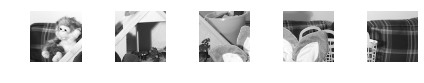

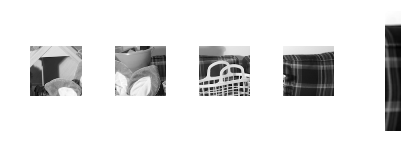

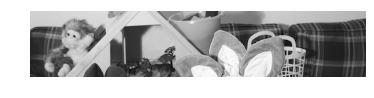

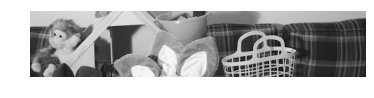

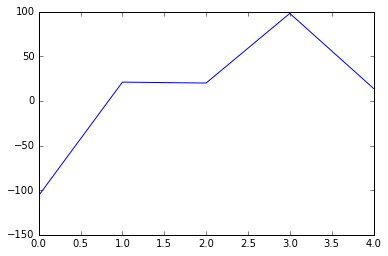

In [348]:
import matplotlib.pyplot as plt
%matplotlib inline
left = plt.imread('left.png');
right = plt.imread('right.png');


#Convert to grayscale, double, [0, 1] range for easier computation
left_gray = gray(left) / 255.0;
right_gray = gray(right) / 255.0;

#Define strip row (y) and square block size (b)
y = 119;
b = 100;

# Extract strip from left image
strip_left = left_gray[y:(y + b ), :];
#figure, imshow(strip_left);

#Extract strip from right image
strip_right = right_gray[y:(y + b ), :];
#imshow(strip_right);

#%% Now match these two strips to compute disparity values
disparity = match_strips(strip_left, strip_right, b);
#disp(disparity);
plt.plot(disparity);

In [327]:
disparity


array([-106.,   21.,   20.,   98.,   14.])

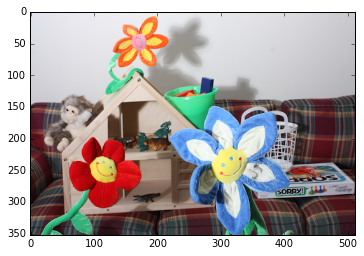

In [92]:
plt.imshow(left)

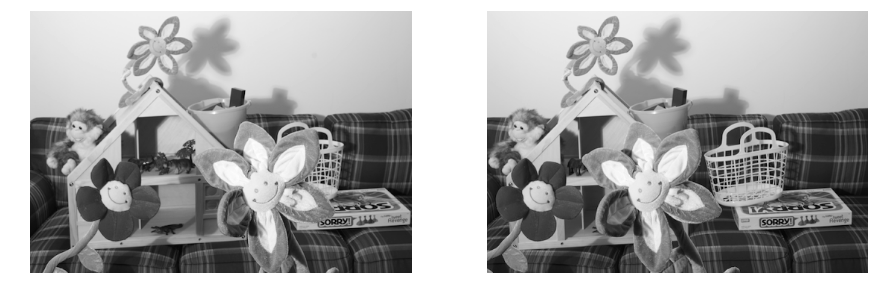

In [266]:
plt.figure(figsize=(15,15))
plt.subplot(121);
plt.imshow(left_gray/left_gray.sum(),cmap='gray');
plt.axis('off');
plt.subplot(122);
plt.imshow(right_gray/right_gray.sum(),cmap='gray');
plt.axis('off');

In [289]:
left.shape[1]%100

12

In [329]:
left_gray.shape

(352, 512)

In [330]:
m=left_gray-right_gray

In [333]:
m2=m*m

In [334]:
m2.sum()

0.15027988